In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/large/statliga-vagar-2m-leq-i-staden0.csv", sep=";")

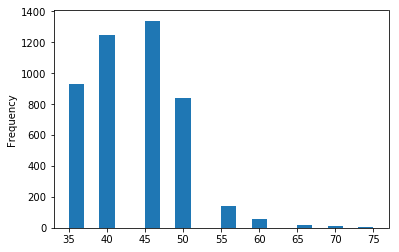

In [3]:
df["ISOVALUE"].plot(kind="hist", bins=20)
plt.show()

In [4]:
df.columns

Index(['Geo Point', 'Geo Shape', 'ISOVALUE', 'Shape_Leng', 'Shape_Area'], dtype='object')

In [5]:
df.iloc[1,]

Geo Point                          56.0282453283, 12.7032431705
Geo Shape     {"type": "Polygon", "coordinates": [[[12.70322...
ISOVALUE                                                     35
Shape_Leng                                               8.7639
Shape_Area                                              5.61443
Name: 1, dtype: object

In [6]:
ashape = df.iloc[1,]["Geo Shape"]
ashape


'{"type": "Polygon", "coordinates": [[[12.703224078938154, 56.02824784794463], [12.703231214856409, 56.02825720169836], [12.7032428641653, 56.0282596346108], [12.703257083628683, 56.02825596493249], [12.703261969482371, 56.02824809264671], [12.703260572336983, 56.028242333581396], [12.703256446225005, 56.02823637007434], [12.703250455079726, 56.02823178937052], [12.703243475901184, 56.028229933600706], [12.703236623305015, 56.02823158867086], [12.703230365106727, 56.02823600224681], [12.703225867168419, 56.028241861557774], [12.703224078938154, 56.02824784794463]]]}'

# Point explorations

In [7]:
from matplotlib.path import Path
import numpy as np

In [8]:
verts = [(0,0), (1,3), (4,6), (5,1)]

mesh_size = 20

x, y = np.meshgrid(np.arange(mesh_size), np.arange(mesh_size))
x = x.flatten()
y = y.flatten()
points = np.vstack((x,y)).T

p = Path(verts)
grid = p.contains_points(points)
mask = grid.reshape(mesh_size, mesh_size)

In [9]:
def tuplify_matrix(m, reduce=False):
    height = len(m)
    width = len(m[0])
    tups = list()
    
    for x in range(width):
        for y in range(height):
            
            val = m[x,y]
            if reduce and not val:
                continue
            
            tup = (x,y)
            tups.append(tup)
    return(tups)

In [10]:
len(mask[0])

20

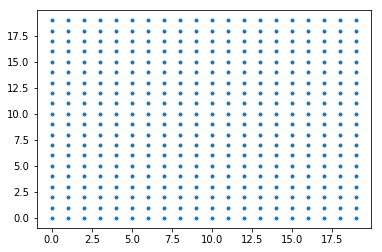

In [11]:
plt.plot(x, y, '.')
plt.show()

In [12]:
tup_mask = tuplify_matrix(mask, reduce=True)

In [13]:
[p for p in tup_mask]

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 3),
 (4, 4),
 (5, 4),
 (6, 4)]

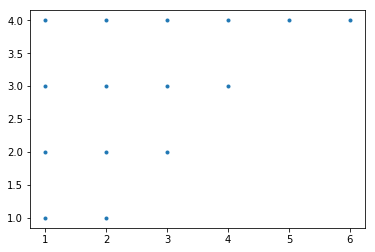

In [14]:
plt.plot([p[0] for p in tup_mask], [p[1] for p in tup_mask], '.')
plt.show()

# Working with the actual shapes

In [29]:
import json
from shapely.geometry import Polygon, mapping

In [16]:
shape_dict = json.loads(ashape)
shape_dict.keys()

dict_keys(['type', 'coordinates'])

In [17]:
shape_dict['type']

'Polygon'

In [53]:
pol_coords = shape_dict['coordinates'][0]
pol_coords

[[12.703224078938154, 56.02824784794463],
 [12.703231214856409, 56.02825720169836],
 [12.7032428641653, 56.0282596346108],
 [12.703257083628683, 56.02825596493249],
 [12.703261969482371, 56.02824809264671],
 [12.703260572336983, 56.028242333581396],
 [12.703256446225005, 56.02823637007434],
 [12.703250455079726, 56.02823178937052],
 [12.703243475901184, 56.028229933600706],
 [12.703236623305015, 56.02823158867086],
 [12.703230365106727, 56.02823600224681],
 [12.703225867168419, 56.028241861557774],
 [12.703224078938154, 56.02824784794463]]

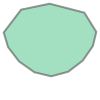

In [34]:
pol = Polygon(pol_coords)
pol

In [39]:
min([pair[0] for pair in pol_coords])

12.703224078938154

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


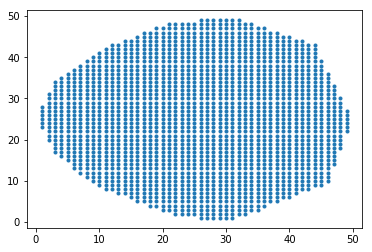

In [61]:
def rasterize(polygon_coords, mesh_size=50):

    x_min = min([pair[0] for pair in pol_coords])
    x_max = max([pair[0] for pair in pol_coords])
    y_min = min([pair[1] for pair in pol_coords])
    y_max = max([pair[1] for pair in pol_coords])
    
    x_step = (x_max - x_min) / mesh_size
    y_step = (y_max - y_min) / mesh_size
    
#     print(x_step)
#     print(y_step)
    
    x, y = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))
    x = x.flatten()
    y = y.flatten()
    points = np.vstack((x,y)).T

    p = Path(polygon_coords)
    grid = p.contains_points(points)
    mask = grid.reshape(mesh_size, mesh_size)
    return(mask)

def tuplify_matrix(m, reduce=False):
    height = len(m)
    width = len(m[0])
    tups = list()
    
    for x in range(width):
        for y in range(height):
            
            val = m[x,y]
            if reduce and not val:
                continue
            
            tup = (x,y)
#             print(tup)
            tups.append(tup)
    return(tups)

pol_rast = rasterize(pol_coords)
print(pol_rast)
tup_mat = tuplify_matrix(pol_rast, reduce=True)
plt.plot([p[0] for p in tup_mat], [p[1] for p in tup_mat], '.')
plt.show()